# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Habilita a exibição dos gráficos no notebook
%matplotlib inline


# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [10]:
# Carregar os dados
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

# Ver as primeiras linhas para explorar a estrutura dos dados
sinasc_raw.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [11]:
# Verificar as colunas disponíveis
print(sinasc_raw.columns)

# Conferir tipos de dados
print(sinasc_raw.dtypes)

# Verificar valores ausentes
print(sinasc_raw.isnull().sum().sort_values(ascending=False).head(10))


Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [12]:
media_idades = sinasc_raw.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].mean().reset_index()
media_idades.rename(columns={'IDADEMAE': 'Idade Média Mãe', 'IDADEPAI': 'Idade Média Pai'}, inplace=True)
media_idades


,munResNome,Idade Média Mãe,Idade Média Pai
0,Alta Floresta D'Oeste,25.991826,29.548701
1,Alto Alegre dos Parecis,24.844156,29.179104
2,Alto Paraíso,24.960177,28.833333
3,Alvorada D'Oeste,25.770732,30.757282
4,Ariquemes,25.607866,32.466667
5,Buritis,25.559177,30.812500
6,Cabixi,26.037500,34.333333
7,Cacaulândia,25.546667,36.333333
8,Cacoal,26.890102,30.931854
9,Campo Novo de Rondônia,24.825301,30.500000


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [13]:
# Converter a data
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

# Filtrar os nascidos em 28 de setembro
aniversario = sinasc_raw[sinasc_raw['DTNASC'].dt.strftime('%d-%m') == '28-09']

# Agrupar por sexo e escolaridade da mãe
peso_medio = aniversario.groupby(['SEXO', 'ESCMAE'])['PESO'].mean().reset_index()
peso_medio.rename(columns={'PESO': 'Peso Médio'}, inplace=True)
peso_medio


,SEXO,ESCMAE,Peso Médio
0,Feminino,1 a 3 anos,3385.000000
1,Feminino,12 anos ou mais,2667.857143
2,Feminino,4 a 7 anos,3428.750000
3,Feminino,8 a 11 anos,3232.777778
4,Masculino,12 anos ou mais,3315.000000
5,Masculino,4 a 7 anos,3425.250000
6,Masculino,8 a 11 anos,3155.238095
7,Masculino,Nenhuma,2620.000000


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [14]:
# Contar nascimentos por município
nascimentos_por_mun = sinasc_raw['munResNome'].value_counts().reset_index()
nascimentos_por_mun.columns = ['munResNome', 'TotalNascimentos']

# Identificar município com menos nascimentos
mun_menos_nasc = nascimentos_por_mun.iloc[-1]['munResNome']

# Filtrar dados desse município
dados_mun = sinasc_raw[sinasc_raw['munResNome'] == mun_menos_nasc]

# Estatísticas das idades
estatisticas_mae = dados_mun['IDADEMAE'].agg(['mean', 'max', 'min'])
estatisticas_pai = dados_mun['IDADEPAI'].agg(['mean', 'max', 'min'])

print(f"Município com menos nascimentos: {mun_menos_nasc}")
print("\nIdade das mães:", estatisticas_mae)
print("\nIdade dos pais:", estatisticas_pai)


Município com menos nascimentos: Município ignorado - RO

Idade das mães: mean    24.0
max     24.0
min     24.0
Name: IDADEMAE, dtype: float64

Idade dos pais: mean    22.0
max     22.0
min     22.0
Name: IDADEPAI, dtype: float64


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [15]:
# Criar coluna com mês do nascimento
sinasc_raw['mes'] = sinasc_raw['DTNASC'].dt.month

# Filtrar para março
marco = sinasc_raw[sinasc_raw['mes'] == 3]

# Contar nascimentos por município
nascimentos_marco = marco['munResNome'].value_counts().reset_index()
nascimentos_marco.columns = ['munResNome', 'TotalNascimentos']

# Identificar município com mais nascimentos
mun_mais_marco = nascimentos_marco.iloc[0]['munResNome']

# Filtrar dados
dados_marco_mun = marco[marco['munResNome'] == mun_mais_marco]

# Estatísticas
filhos_vivos = dados_marco_mun['QTDFILVIVO'].agg(['mean', 'max', 'min'])
idade_pais = dados_marco_mun['IDADEPAI'].agg(['mean', 'max', 'min'])

print(f"Município com mais nascimentos em março: {mun_mais_marco}")
print("\nFilhos vivos - Média, Máximo, Mínimo:", filhos_vivos)
print("\nIdade dos pais - Média, Máximo, Mínimo:", idade_pais)

# Insight exemplo:
idade_mae_marco = dados_marco_mun['IDADEMAE'].median()
print(f"\nInsight: A idade mediana das mães que deram à luz em março em {mun_mais_marco} foi de {idade_mae_marco} anos.")


Município com mais nascimentos em março: Porto Velho

Filhos vivos - Média, Máximo, Mínimo: mean    1.295056
max     9.000000
min     0.000000
Name: QTDFILVIVO, dtype: float64

Idade dos pais - Média, Máximo, Mínimo: mean    34.629032
max     62.000000
min     19.000000
Name: IDADEPAI, dtype: float64

Insight: A idade mediana das mães que deram à luz em março em Porto Velho foi de 26.0 anos.


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [16]:
sinasc_raw.dtypes

,0
ORIGEM,int64
CODESTAB,float64
CODMUNNASC,int64
LOCNASC,int64
IDADEMAE,int64
...,...
munResLat,float64
munResLon,float64
munResAlt,float64
munResArea,float64


In [17]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf,mes
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,2
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,2
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,2
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,3
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia,12
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia,10
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia,8
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia,12


In [18]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea', 'mes'],
      dtype='ob

## Insight

In [19]:
# Média de filhos vivos em todo o estado
media_geral_filhos = sinasc_raw['QTDFILVIVO'].mean()

# Município com mais nascimentos em março (exemplo: Porto Velho)
mun_mais_nasc_marco = 'Porto Velho'  # Substitua pelo valor real do seu resultado
dados_mun = sinasc_raw[(sinasc_raw['munResNome'] == mun_mais_nasc_marco) &
                       (sinasc_raw['DTNASC'].dt.month == 3)]
media_mun_filhos = dados_mun['QTDFILVIVO'].mean()

print(f"Média de filhos vivos geral: {media_geral_filhos:.2f}")
print(f"Média de filhos vivos em {mun_mais_nasc_marco} (março): {media_mun_filhos:.2f}")


Média de filhos vivos geral: 1.05
Média de filhos vivos em Porto Velho (março): 1.30


In [20]:
# Diferença média entre idade do pai e da mãe
sinasc_raw['diferenca_idade'] = sinasc_raw['IDADEPAI'] - sinasc_raw['IDADEMAE']
media_diferenca = sinasc_raw['diferenca_idade'].mean()
print(f"Em média, os pais são {media_diferenca:.1f} anos mais velhos que as mães.")


Em média, os pais são 4.1 anos mais velhos que as mães.


<ipython-input-30-3f792d0aa49a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


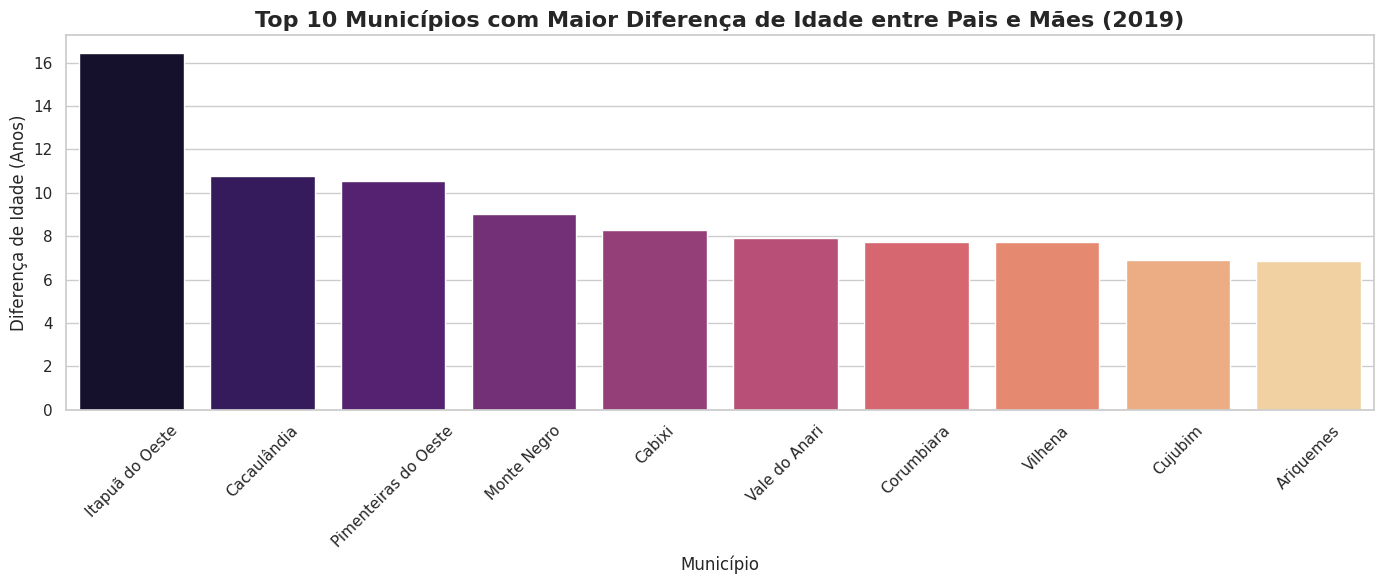

Insight Automático:
Top 3 municípios com maior diferença de idade entre pais e mães em média:

• Itapuã do Oeste:
   → Idade média das mães: 26.1 anos
   → Idade média dos pais: 42.5 anos
   → Diferença média: 16.4 anos

• Cacaulândia:
   → Idade média das mães: 25.5 anos
   → Idade média dos pais: 36.3 anos
   → Diferença média: 10.8 anos

• Pimenteiras do Oeste:
   → Idade média das mães: 25.1 anos
   → Idade média dos pais: 35.6 anos
   → Diferença média: 10.5 anos



In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo bonito para o gráfico
sns.set(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (14, 6)

# 1. Agrupamento por município
media_idades = sinasc_raw.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].mean().dropna().reset_index()

# 2. Diferença de idade entre pais e mães
media_idades['Diferença (Pai - Mãe)'] = media_idades['IDADEPAI'] - media_idades['IDADEMAE']

# 3. Seleção dos 10 municípios com maior diferença
top_diferencas = media_idades.sort_values(by='Diferença (Pai - Mãe)', ascending=False).head(10)

# 4. Gráfico
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_diferencas,
    x='munResNome',
    y='Diferença (Pai - Mãe)',
    palette='magma'
)
plt.title('Top 10 Municípios com Maior Diferença de Idade entre Pais e Mães (2019)', fontsize=16, weight='bold')
plt.xlabel('Município')
plt.ylabel('Diferença de Idade (Anos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Exibir os dados no print (resumo do insight)
print("Insight Automático:")
print("Top 3 municípios com maior diferença de idade entre pais e mães em média:\n")

for idx, row in top_diferencas.head(3).iterrows():
    print(f"• {row['munResNome']}:")
    print(f"   → Idade média das mães: {row['IDADEMAE']:.1f} anos")
    print(f"   → Idade média dos pais: {row['IDADEPAI']:.1f} anos")
    print(f"   → Diferença média: {row['Diferença (Pai - Mãe)']:.1f} anos\n")
